# Week 05: Continuing interactivity in Python with the viz engine bqplot

## But first, some hints for the HW

Let's look at an example dataset:

In [1]:
import pandas as pd

bf = pd.read_csv("https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/refs/heads/main/bfro_reports_fall2022.csv",
                  parse_dates = ["date"])

# you might get a memory warning thing, its just not deprecated correctly
#  try not to panic :D

In [2]:
bf

,observed,location_details,county,state,season,title,latitude,longitude,date,number,...,precip_intensity,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed,location
0,Ed L. was salmon fishing with a companion in P...,East side of Prince William Sound,Valdez-Chitina-Whittier County,Alaska,Fall,NaN,NaN,NaN,NaT,1261.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,heh i kinda feel a little dumb that im reporti...,"the road is off us rt 80, i dont know the exit...",Warren County,New Jersey,Fall,NaN,NaN,NaN,NaT,438.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I was on my way to Claremont from Lebanon on R...,Close to Claremont down 120 not far from Kings...,Sullivan County,New Hampshire,Summer,Report 55269: Dawn sighting at Stevens Brook o...,43.41549,-72.33093,2016-06-07,55269.0,...,0.001,0.7,rain,998.87,Mostly cloudy throughout the day.,6.0,9.70,262.0,0.49,POINT(-72.33093000000001 43.415490000000005)
3,I was northeast of Macy Nebraska along the Mis...,Latitude & Longitude : 42.158230 -96.344197,Thurston County,Nebraska,Spring,Report 59757: Possible daylight sighting of a ...,42.15685,-96.34203,2018-05-25,59757.0,...,0.000,0.0,NaN,1008.07,Partly cloudy in the morning.,10.0,8.25,193.0,3.33,POINT(-96.34203000000001 42.15685)
4,"While this incident occurred a long time ago, ...","Ward County, Just outside of a the Minuteman T...",Ward County,North Dakota,Spring,Report 751: Hunter describes described being s...,48.25422,-101.31660,2000-04-21,751.0,...,NaN,NaN,rain,1011.47,Partly cloudy until evening.,6.0,10.00,237.0,11.14,POINT(-101.3166 48.254220000000004)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4742,My cousin and I were camping way out in the wo...,"Indiana, Brown County, Elkinsville, Lake Monro...",Brown County,Indiana,Spring,NaN,NaN,NaN,NaT,2460.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4743,While backpacking near the horse trails and ac...,Near Bedford south of Brown County in the Hoos...,Brown County,Indiana,Winter,NaN,NaN,NaN,NaT,2461.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4744,My wife and I were camping At Yellowood State ...,Yellowood State Park. Off of highway 46 in bet...,Brown County,Indiana,Summer,Report 49480: Campers hear possible vocalizati...,39.17909,-86.33560,2015-08-08,49480.0,...,0.000,0.0,NaN,1014.02,Mostly cloudy in the evening.,9.0,9.22,256.0,0.34,POINT(-86.3356 39.17909)
4745,My wife and I were driving to Indianapolis to ...,On Interstate 65 in Indiana somewhere around t...,Boone County,Indiana,Winter,NaN,NaN,NaN,NaT,2459.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Second thing to notice, is this is a pretty darn big dataset!  This can get a little cumbersome if you want to be able to do some quick prototyping of visualizations.  

Depending on what sort of computer you are working on, you may want to consider working with a *random subset* of this dataframe for your "prototyping" phase, and then only use the full dataset when you are ready for *production*:

In [3]:
# Lets down sample to 500 samples:
import numpy as np

nsamples = 500
downSampleMask = np.random.choice(range(len(bf)-1), nsamples, replace=False)
downSampleMask # take a look

array([ 743, 2554, 3482, 3491, 1042, 4113, 3020, 3711,   30, 3112,  329,
       2762, 4497, 3391, 4370, 2934, 4330, 1193, 3357, 1116, 1626, 1077,
       3830, 4075, 2964, 4561, 4107, 1878, 3576, 4461, 4635, 1168, 3748,
       2990, 3336, 4643, 2445, 2736, 2988, 4672,  259,  706, 1945, 2301,
       2790, 1356, 3768, 3398, 3277, 2829, 3146, 2721,  801,  924, 1369,
       3071, 1785, 3652, 3624,  193,  631,  429, 1663, 1705, 2183, 1516,
       3485,  884, 2644, 1939, 3773, 3266, 2945,  674, 1350, 3974, 3511,
         21, 1592,  381,  556,  892, 2794, 4178, 1717, 1259, 4684,  918,
       2885, 2356, 4070,  401, 4734, 4306,  384, 2039, 1299, 1437, 3310,
       2320, 3433,  312, 2220, 4445, 1873, 2923, 3803, 1740, 3452, 4016,
       2778, 2058, 1523, 2788, 3044, 3900, 4025, 3316,  205, 1096, 1465,
        313, 2104, 4744, 4721, 1908, 2202, 4336, 3562, 1480,  230, 1285,
       3579,  278, 3945, 3029, 4195, 4207,  708, 1371, 2541, 2051, 4671,
       2062,  418,  129, 3369, 1762,  915,  951,  4

Note: I haven't set the "seed" for this random pull of indicies so your list might be different!

So, downSampleMask is now a list of random indicies for the UFO dataset.  Let's downsample our dataset:

In [4]:
bfDS = bf.loc[downSampleMask]

In [5]:
bfDS

,observed,location_details,county,state,season,title,latitude,longitude,date,number,...,precip_intensity,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed,location
743,It was at approximately 9:00 - 9:30 p.m. My m...,"Garden State Parkway South, Exit 50 New Gretna...",Burlington County,New Jersey,Summer,Report 14143: Night sighting by motorists near...,39.60835,-74.43445,1998-07-15,14143.0,...,0.0000,0.0,NaN,1018.43,Mostly cloudy until evening.,5.0,8.28,195.0,5.61,POINT(-74.43445 39.60835)
2554,"Mrs. Brenda G., washing the dinner dishes, loo...","Just South of the small community of Yacolt, W...",Clark County,Washington,Summer,Report 933: Family has face to face encounter ...,45.85810,-122.40890,1989-06-14,933.0,...,0.0136,1.0,rain,1016.46,Light rain in the morning and afternoon.,4.0,7.67,128.0,0.94,POINT(-122.4089 45.8581)
3482,"In 1974, I purchased an arce of land in northe...",California Pines--an area boarded on 3 sides b...,Modoc County,California,Summer,Report 875: Man has sighting near Alturas,41.41000,-120.67810,1974-06-01,875.0,...,NaN,NaN,rain,NaN,Clear throughout the day.,8.0,NaN,316.0,4.15,POINT(-120.6781 41.41)
3491,I believe this event took place in the late 19...,Standish - Hickey State Park. Across the river...,Mendocino County,California,Summer,NaN,NaN,NaN,NaT,4182.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1042,It happened when my friend and I were 13. When...,"Going out of Belmont, towards Alfred, after th...",Allegany County,New York,Winter,Report 28244: Young girls remember seeing a ha...,42.24542,-77.98756,1999-01-16,28244.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT(-77.98756 42.24542)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,This incident happened around 1988-89. I was ...,NaN,Erie County,Pennsylvania,Fall,NaN,NaN,NaN,NaT,3634.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1772,I was sitting at camp and could smell the fami...,NaN,Polk County,Tennessee,Fall,NaN,NaN,NaN,NaT,1947.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1385,I was with a group of bow hunters in a canyon ...,This took place off of an old logging road tha...,Umatilla County,Oregon,Fall,Report 31488: Woman describes possible encount...,45.48318,-118.83000,1998-10-15,31488.0,...,0.0012,0.4,rain,1015.79,Mostly cloudy until evening.,3.0,9.77,244.0,6.42,POINT(-118.83 45.48318)
3001,It was the opening morning of Kentucky black p...,Old reclamation stripped mine. Also called pin...,Harlan County,Kentucky,Fall,Report 40278: Hunter in a ghillie suit on Pine...,37.00633,-83.56467,2006-12-09,40278.0,...,0.0000,0.0,NaN,1033.84,Clear throughout the day.,2.0,9.58,201.0,1.49,POINT(-83.56466999999999 37.00633)


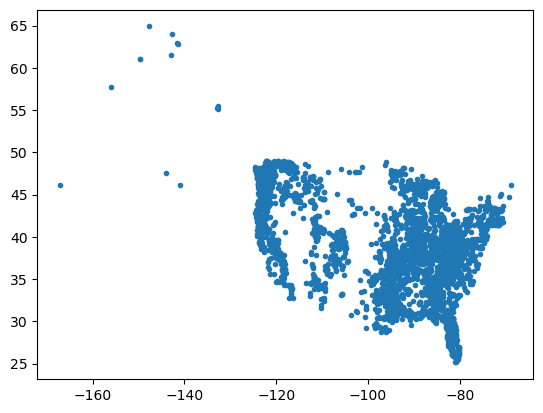

In [6]:
# take a quick look
import matplotlib.pyplot as plt
plt.clf() # might need this to "get rid" of Michigan data
plt.plot(bf['longitude'],bf['latitude'],'.')
plt.show()

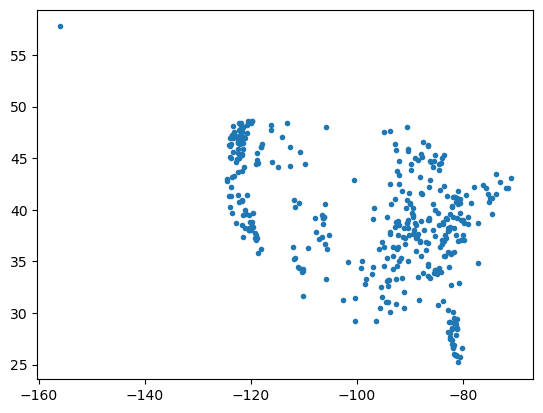

In [7]:
plt.clf() # might need this to "get rid" of Michigan data
plt.plot(bfDS['longitude'],bfDS['latitude'],'.')
plt.show()

We can try with a scatter plot as well which allows us to add in another encoding with color:

In [8]:
bf.columns

Index(['observed', 'location_details', 'county', 'state', 'season', 'title',
       'latitude', 'longitude', 'date', 'number', 'classification', 'geohash',
       'temperature_high', 'temperature_mid', 'temperature_low', 'dew_point',
       'humidity', 'cloud_cover', 'moon_phase', 'precip_intensity',
       'precip_probability', 'precip_type', 'pressure', 'summary', 'uv_index',
       'visibility', 'wind_bearing', 'wind_speed', 'location'],
      dtype='object')

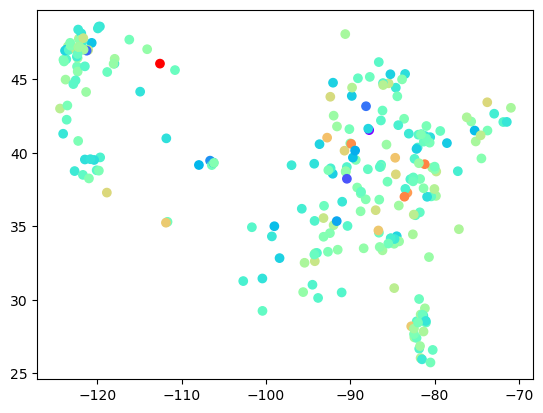

In [9]:
plt.clf()
plt.scatter(bfDS['longitude'],bfDS['latitude'], 
            c=np.log10(bfDS['pressure']), cmap='rainbow')
plt.show()

Hint:

<Figure size 640x480 with 0 Axes>

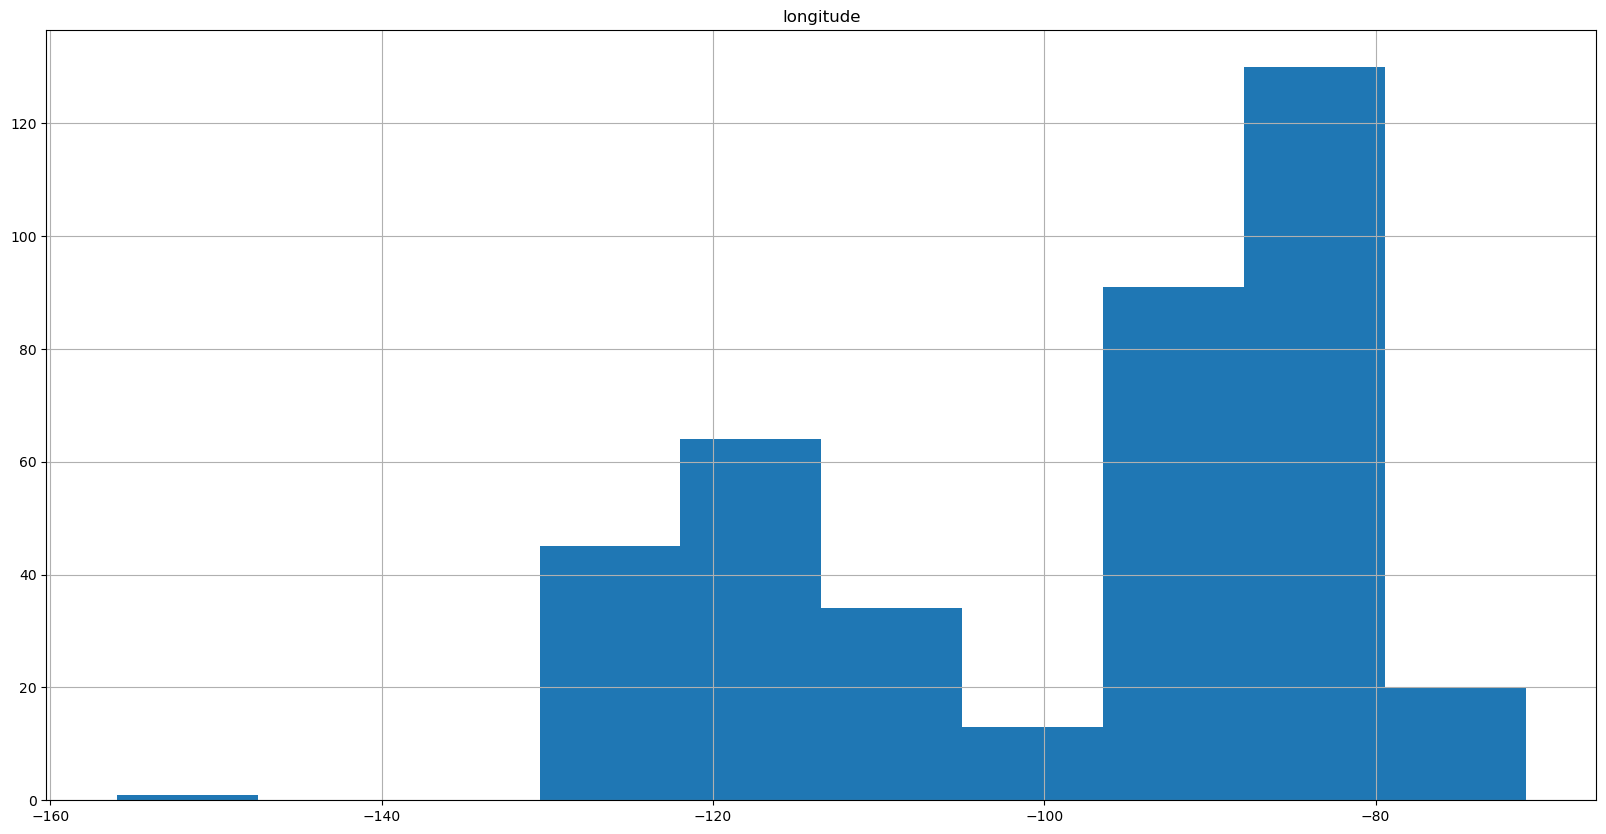

In [10]:
plt.clf()
fig, ax = plt.subplots(figsize=(20,10))
bfDS.hist(column='longitude', ax=ax)
plt.show()

### A bit with traitlets

Remember our color-picker that we linked:

In [11]:
import ipywidgets

In [12]:
islider = ipywidgets.IntSlider(min = 0, max = 10, step = 1, orientation = 'vertical')
islider

IntSlider(value=0, max=10, orientation='vertical')

In [13]:
cp = ipywidgets.ColorPicker()
cp

ColorPicker(value='black')

Let's link them using .link this time:

In [14]:
ipywidgets.link( (cp, 'value'), (islider.style, 'handle_color') )

We note what prints out now is a "traitlets.traitlets" link -- this is part of the python-backend traitlets library.

Traitlets are a way to link the *change in a variable* to an action.

We'll start by making a class w/o using traitlets.  We've worked with classes before, just sort of "under the radar" like with Pandas objects.  Now we will define our own:

In [15]:
class MyObject():
    name = 'unnamed'
    age = 0

Let's define a new variable of this `class` type:

In [16]:
my_obj = MyObject()

In [17]:
my_obj.name, my_obj.age

('unnamed', 0)

We can update the values of these variables like we would any other object:

In [18]:
my_obj.name = 'Bob'; my_obj.age = 47

Now, let's check out our new values:

In [19]:
print('Hello, my name is:', my_obj.name, 'and I am', my_obj.age, 'years old')

Hello, my name is: Bob and I am 47 years old


Now, let's say I wanted to re-set the values of the variables in my class -- to print out the above statement, I'd have to redo everything:

In [20]:
my_obj.name = 'Linda'; my_obj.age = 45

In [21]:
print('Hello, my name is:', my_obj.name, 'and I am', my_obj.age, 'years old')

Hello, my name is: Linda and I am 45 years old


The `traitlets` library allows us to "track" changes so that we can associate actions with updates to variables.  Let's try this example again:

In [22]:
import traitlets

In [23]:
class MyTraitletObject(traitlets.HasTraits):
    # lets use the unicode trait to let our object have a name
    name = traitlets.Unicode("unnamed") 
    # lets also give our object an age
    age = traitlets.Int(0)

In [24]:
my_t_obj = MyTraitletObject()
my_t_obj.age = 47
my_t_obj.name = 'Bob'

In [25]:
print('Hello, my name is:', my_t_obj.name, 'and I am', my_t_obj.age, 'years old')

Hello, my name is: Bob and I am 47 years old


So far this is not very exciting - we are back where we started!  However, there are options to "observe" changes in our traits:

Let's create a function that can act on one of the variables of our variables, in particluar, its going to react to the name in my object:

In [26]:
def name_changed(change):
    print(change) # this is a format that is required of a traitlets class

# lets tell traitlets that we are going to change something
my_t_obj.observe(name_changed, ['name'])

In [27]:
my_t_obj.name = 'Linda'

{'name': 'name', 'old': 'Bob', 'new': 'Linda', 'owner': <__main__.MyTraitletObject object at 0x17d9db2b0>, 'type': 'change'}


We can see that there are these weird "new" and "old" names -- this is tracking how things change. The "owner" is just pointing to the memory location of `my_t_obj`.

Let's do something a little more exciting - have a default print-out of the introduction:

In [28]:
def name_changed2(change):
    print('Hello, my name is', change['new'], 'and I am', change['owner'].age, 'years old')

# lets tell traitlets that we are going to change something
my_t_obj.observe(name_changed2, ['name'])

In [29]:
my_t_obj.name = 'Linda'

Note that now, I've got *2* things associated with any changes -- let's take off the first one:

In [30]:
my_t_obj.unobserve(name_changed, ['name'])

In [31]:
my_t_obj.name = "Bob"

Hello, my name is Bob and I am 47 years old


We can practice by making a "watching for a change" function for age as well:

In [32]:
def age_changed(change):
    print('Hello, my name is', change['owner'].name, 'and I am', change['new'], 'years old')

my_t_obj.observe(age_changed, ['age'])

In [33]:
my_t_obj.age = 48

Hello, my name is Bob and I am 48 years old


In [34]:
my_t_obj.name, my_t_obj.age = 'Louise', 8

Hello, my name is Louise and I am 48 years old
Hello, my name is Louise and I am 8 years old


## On to bqplot!

Make sure you have installed this via the install script `test_imports_week01.ipynb` in week 1.  You may have to restart your jupyter or your browswer.

We'll start by using `bqplot` in a Grammar of Graphics & *Declaritive* sort of way, and then, if we have time, spend a few moments looking at its `matplotlib`-like interface as well which is an *Imperative* method.

In [35]:
import bqplot
import numpy as np
import ipywidgets

Now we are going to mess around with some of the declaritive programming type options that bqplot can use.  This will rely heavily on the "Grammar of Graphics" constructs.

## Random line plot with Pan/Zoom interaction

We'll now go through the example I put up on the slides for this week. 

**Data:** Let's first start by creating *data* elements for our graphic just some random numbers:

In [36]:
x = np.arange(100) # integers 0->999
y = np.random.random(100) + 5 # random numbers with mean = 5

In [37]:
x, y

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([5.72106428, 5.71780119, 5.35225657, 5.25673881, 5.49946952,
        5.5062071 , 5.45114661, 5.58191022, 5.30884855, 5.26110477,
        5.13666282, 5.41355647, 5.56351397, 5.7806561 , 5.55410205,
        5.7008818 , 5.02638882, 5.04573708, 5.46688392, 5.18830972,
        5.64924504, 5.69416655, 5.68949569, 5.6107676 , 5.1112199 ,
        5.62207243, 5.99945413, 5.34082634, 5.86314361, 5.92644083,
        5.90952981, 5.61184527, 5.40436957, 5.09964991, 5.18444586,
        5.7624286 , 5.53890177, 5.60767481, 5.84478787, 5.52598863,
      

**Scales:** Now we'll define some scale objects which will determine how lines will be drawn on our canvas:

In [38]:
bqplot.LinearScale?

Init signature: bqplot.LinearScale(*args: 't.Any', **kwargs: 't.Any') -> 't.Any'
Docstring:     
A linear scale.

An affine mapping from a numerical domain to a numerical range.

Attributes
----------
min: float or None (default: None)
    if not None, min is the minimal value of the domain
max: float or None (default: None)
    if not None, max is the maximal value of the domain
rtype: string (class-level attribute)
    This attribute should not be modified. The range type of a linear
    scale is numerical.
dtype: type (class-level attribute)
    the associated data type / domain type
precedence: int (class-level attribute, default_value=2)
    attribute used to determine which scale takes precedence in cases when
    two or more scales have the same rtype and dtype.
    default_value is 2 because for the same range and domain types,
    LinearScale should take precedence.
stabilized: bool (default: False)
    if set to False, the domain of the scale is tied to the data range
    if 

In [39]:
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

**Marks:** Now we are going to use GoG type calls to define what lines to actually draw combining information about our data and our scales:

In [40]:
bqplot.Lines?

Init signature: bqplot.Lines(*args: 't.Any', **kwargs: 't.Any') -> 't.Any'
Docstring:     
Lines mark.

In the case of the Lines mark, scales for 'x' and 'y' MUST be provided.

Attributes
----------
icon: string (class-level attribute)
    Font-awesome icon for the respective mark
name: string (class-level attribute)
    User-friendly name of the mark
colors: list of colors (default: CATEGORY10)
    List of colors of the Lines. If the list is shorter than the number
    of lines, the colors are reused.
close_path: bool (default: False)
    Whether to close the paths or not.
fill: {'none', 'bottom', 'top', 'inside', 'between'}
    Fill in the area defined by the curves
fill_colors: list of colors (default: [])
    Fill colors for the areas. Defaults to stroke-colors when no
    color provided
opacities: list of floats (default: [])
    Opacity for the  lines and patches. Defaults to 1 when the list is too
    short, or the element of the list is set to None.
fill_opacities: list of floa

In [41]:
lines = bqplot.Lines(x = x, y = y, scales = {'x': x_sc, 'y': y_sc})

**Axis:** Now, we are going to define what axis we want placed around the lines that we draw we'll draw both x & y axis.

In [42]:
bqplot.Axis?

Init signature: bqplot.Axis(*args: 't.Any', **kwargs: 't.Any') -> 't.Any'
Docstring:     
A line axis.

A line axis is the visual representation of a numerical or date scale.

Attributes
----------
icon: string (class-level attribute)
    The font-awesome icon name for this object.
axis_types: dict (class-level attribute)
    A registry of existing axis types.
orientation: {'horizontal', 'vertical'}
    The orientation of the axis, either vertical or horizontal
side: {'bottom', 'top', 'left', 'right'} or None (default: None)
    The side of the axis, either bottom, top, left or right.
label: string (default: '')
    The axis label
tick_format: string or None (default: '')
    The tick format for the axis, for dates use d3 string formatting.
scale: Scale
    The scale represented by the axis
num_ticks: int or None (default: None)
    If tick_values is None, number of ticks
tick_values: numpy.ndarray or None (default: None)
    Tick values for the axis
offset: dict (default: {})
    Cont

In [43]:
ax_x = bqplot.Axis(scale = x_sc, label = 'X Value')
ax_y = bqplot.Axis(scale = y_sc, label = 'Y Value', orientation = 'vertical')

**Figure:** Finally, we combine all these things together into a bonified figure:

In [44]:
bqplot.Figure?

Init signature: bqplot.Figure(*args: 't.Any', **kwargs: 't.Any') -> 't.Any'
Docstring:     
Main canvas for drawing a chart.

The Figure object holds the list of Marks and Axes. It also holds an
optional Interaction object that is responsible for figure-level mouse
interactions, the "interaction layer".

Besides, the Figure object has two reference scales, for positioning items
in an absolute fashion in the figure canvas.

Attributes
----------
title: string (default: '')
    title of the figure
axes: List of Axes (default: [])
    list containing the instances of the axes for the figure
marks: List of Marks (default: [])
    list containing the marks which are to be appended to the figure
interaction: Interaction or None (default: None)
    optional interaction layer for the figure
scale_x: Scale
    Scale representing the x values of the figure
scale_y: Scale
    Scale representing the y values of the figure
padding_x: Float (default: 0.0)
    Padding to be applied in the horizontal 

In [45]:
fig = bqplot.Figure(marks = [lines], axes = [ax_x, ax_y])
#display(fig) # you might also want to try "display"
# if you don't see the following fig, here is where
#  you might have to close and reopen your notebook
fig # note: just "fig" instead of "display(fig)" may also be an option for you

Figure(axes=[Axis(label='X Value', scale=LinearScale(), side='bottom'), Axis(label='Y Value', orientation='ver…

Ok, but this isn't interactive in anyway lets make it!!  There are a few "interactions" supported in `bqplot` but not all of them are supported for all types of plots.  The docs can be a little nebulous about what plot can use what type of interaction, so we'll just try a few and see what happens.  Here, let's add in an ability to pan/zoom in our plot:

In [46]:
bqplot.interacts?

Type:        module
String form: <module 'bqplot.interacts' from '/opt/anaconda3/envs/DataViz2/lib/python3.10/site-packages/bqplot/interacts.py'>
File:        /opt/anaconda3/envs/DataViz2/lib/python3.10/site-packages/bqplot/interacts.py
Docstring:  
Interacts

.. currentmodule:: bqplot.interacts

.. autosummary::
   :toctree: _generate/

   BrushIntervalSelector
   BrushSelector
   HandDraw
   IndexSelector
   FastIntervalSelector
   MultiSelector
   OneDSelector
   Interaction
   PanZoom
   Selector
   TwoDSelector

In [47]:
bqplot.interacts.PanZoom?

Init signature: bqplot.interacts.PanZoom(*args: 't.Any', **kwargs: 't.Any') -> 't.Any'
Docstring:     
An interaction to pan and zoom wrt scales.

Attributes
----------
allow_pan: bool (default: True)
    Toggle the ability to pan.
allow_zoom: bool (default: True)
    Toggle the ability to zoom.
scales: Dictionary of lists of Scales (default: {})
    Dictionary with keys such as 'x' and 'y' and values being the scales in
    the corresponding direction (dimensions) which should be panned or
    zoomed.
Init docstring: Public constructor
File:           /opt/anaconda3/envs/DataViz2/lib/python3.10/site-packages/bqplot/interacts.py
Type:           MetaHasTraits
Subclasses:     

In [48]:
pz = bqplot.interacts.PanZoom( scales = {'x': [x_sc], 'y': [y_sc]})

In [49]:
fig = bqplot.Figure(marks = [lines], axes = [ax_x, ax_y], interaction = pz)
#display(fig)
fig

Figure(axes=[Axis(label='X Value', scale=LinearScale(), side='bottom'), Axis(label='Y Value', orientation='ver…

Note that if I pan and zoom, the figure updates. Ooooo. fancy.

Note also, that the above figure also reacts as well this is because we are using the same lines & ax's objects -- recall back to last week that this was a feature of using ipywidgets and traitlets as well.

### ASIDE: where things can go wrong (SKIPPING generally):

In [50]:
# lets see an example of where this can fail

# first lets make an x from 0-10 in 100 steps
x = np.mgrid[0.0:10.0:100j]
# and 2 y variables
y1 = x * 2
y2 = x**2

In [51]:
x_sc = bqplot.LinearScale(min = 1, max = 10)
# lets do one y-scale over linear and 1 over log
y_sc1 = bqplot.LinearScale(min = 1, max = 20)
y_sc2 = bqplot.LogScale(min = 1, max = 100)

In [52]:
# lets genrate lines for each y value
lines1 = bqplot.Lines(x = x, y = y1, scales = {'x': x_sc, 'y': y_sc1})
lines2 = bqplot.Lines(x = x, y = y2, scales = {'x': x_sc, 'y': y_sc2})

In [53]:
# and lets plot an x axis like before
ax_x = bqplot.Axis(scale = x_sc, label = 'X Value')
# and one y axis on the left
ax_y1 = bqplot.Axis(scale = y_sc1, label = 'Y1 Value', 
                    orientation = 'vertical')
# and one y-axis on the right
ax_y2 = bqplot.Axis(scale = y_sc2, label = 'Y2 Value', 
                    orientation = 'vertical', side = 'right')

In [54]:
# lets allow pan and zoom
pz = bqplot.interacts.PanZoom(scales = {'x': [x_sc], 
                                        'y': [y_sc1, y_sc2]})
#bqplot.interacts.PanZoom?
fig = bqplot.Figure(marks = [lines1, lines2], 
                    axes = [ax_x, ax_y1, ax_y2], interaction=pz)
#display(fig)
fig
# now we note if we zoom out too far, or pan to too negative of the x-axis
# we lose a line

# why? because the line is log-scaled, and log(numbers < 0) is undefined

# this is a way in which declaritive programming can fail because there
#  aren't obvious options to inhibit pan&zoom to a positive range

Figure(axes=[Axis(label='X Value', scale=LinearScale(max=10.0, min=1.0), side='bottom'), Axis(label='Y1 Value'…

### END ASIDE/SKIP

FYI lots of more fun notebooks here: https://github.com/dmadeka/PyGotham-2017

From video tutorial here: https://www.youtube.com/watch?v=rraXF0EjRC8

## Random Scatter plot
Ok, lets do another quick interactive example using a scatter plot:

In [55]:
# 1. Data
x = np.random.random(100) # random points betweeon 0-1
y = np.random.random(100) # random points betweeon 0-1

In [56]:
x, y

(array([0.77193634, 0.00965458, 0.25115502, 0.52004931, 0.51256134,
        0.52801354, 0.09583025, 0.9715151 , 0.40672006, 0.97841824,
        0.57205302, 0.16604211, 0.99616081, 0.55022351, 0.85058701,
        0.83547237, 0.47286333, 0.60388748, 0.23883521, 0.05499903,
        0.53324366, 0.39997573, 0.59691392, 0.00458049, 0.12762168,
        0.51024583, 0.10472266, 0.05821621, 0.46910477, 0.16254177,
        0.46483591, 0.72150307, 0.12196169, 0.24171946, 0.87073741,
        0.3994065 , 0.45245364, 0.57587716, 0.83101714, 0.77053489,
        0.03007659, 0.68123844, 0.39370244, 0.43523919, 0.07107062,
        0.43292028, 0.39212446, 0.36379171, 0.03278074, 0.83057352,
        0.26565936, 0.00358151, 0.8220916 , 0.3811829 , 0.43959686,
        0.77739317, 0.38957635, 0.75521528, 0.23720355, 0.28958063,
        0.82713685, 0.08434054, 0.7281231 , 0.15110713, 0.42449378,
        0.79881266, 0.63352915, 0.32545863, 0.05424941, 0.30496133,
        0.631374  , 0.90306901, 0.025556  , 0.25

Create scales and axis like we did before:

In [57]:
# 2. scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# 3. axis
x_ax = bqplot.Axis(scale = x_sc, label = 'X')
y_ax = bqplot.Axis(scale = y_sc, label = 'Y', orientation = 'vertical')

Create a scatter plot graphing object with these random x/y and scales:

In [58]:
bqplot.Scatter?

Init signature: bqplot.Scatter(*args: 't.Any', **kwargs: 't.Any') -> 't.Any'
Docstring:     
Scatter mark.

In the case of the Scatter mark, scales for 'x' and 'y' MUST be provided.
The scales of other data attributes are optional. In the case where another
data attribute than 'x' or 'y' is provided but the corresponding scale is
missing, the data attribute is ignored.

Attributes
----------
icon: string (class-level attribute)
    Font-awesome icon for that mark
name: string (class-level attribute)
    User-friendly name of the mark
marker: {'circle', 'cross', 'diamond', 'square', 'triangle-down', 'triangle-up', 'arrow', 'rectangle', 'ellipse'}
    Marker shape
colors: list of colors (default: ['steelblue'])
    List of colors of the markers. If the list is shorter than the number
    of points, the colors are reused.
default_colors: Deprecated
    Same as `colors`, deprecated as of version 0.8.4
fill: Bool (default: True)
    Whether to fill the markers or not
stroke: Color or None (

In [59]:
# 4. marks
scatters = bqplot.Scatter(x = x,
                          y = y,
                          scales = {'x': x_sc, 'y': y_sc})

Now, lets create a selector to select points along the x-axis.  We will use the `bqplot` interaction called `FastIntervalSelector`:

In [60]:
bqplot.interacts.FastIntervalSelector?

Init signature: bqplot.interacts.FastIntervalSelector(*args: 't.Any', **kwargs: 't.Any') -> 't.Any'
Docstring:     
Fast interval selector interaction.

This 1-D selector is used to select an interval on the x-scale
by just moving the mouse (without clicking or dragging). The
x-coordinate of the mouse controls the mid point of the interval selected
while the y-coordinate of the mouse controls the the width of the interval.
The larger the y-coordinate, the wider the interval selected.

Interval selector has three modes:
    1. default mode: This is the default mode in which the mouse controls
            the location and width of the interval.
    2. fixed-width mode: In this mode the width of the interval is frozen
            and only the location of the interval is controlled with the
            mouse.
            A single click from the default mode takes you to this mode.
            Another single click takes you back to the default mode.
    3. frozen mode: In this mode the sele

In [61]:
# 5. interactions
selector = bqplot.interacts.FastIntervalSelector(
            scale = x_sc, marks = [scatters]) 

Let's check out the full figure + interaction!

In [62]:
# Finally: fig
fig = bqplot.Figure(marks = [scatters], axes = [x_ax, y_ax], interaction = selector)
fig

Figure(axes=[Axis(label='X', scale=LinearScale(), side='bottom'), Axis(label='Y', orientation='vertical', scal…

This might depend on what computer you are in, but on my mac, I click to start selecting and then double click to "lock in" my selected region.

How do we tell what interval we have selected?

In [65]:
selector.selected

array([0.19930137, 0.30648129])

So, its a little hard to see what points are selected.  There are some hidden tags within our scatter plot points that we can mess with to change our our plot looks.  These have CSS styling (how HTML is styled), so they'll look very un-Pythonic, because they are!  We'll get more into this sort of thing when we are doing Javascript later in the course:

In [66]:
scatters.unselected_style={'opacity': 0.8} # when unselected, make the points a little see-through

scatters.selected_style={'fill': 'red', 'stroke': 'yellow'} # fill with red, outline in yellow when selected

Display updated figure (though, like with widgets, this change is "backreactive" and will show up above as well):

In [67]:
fig = bqplot.Figure(marks = [scatters], axes = [x_ax, y_ax], interaction = selector)
#display(fig)
fig

Figure(axes=[Axis(label='X', scale=LinearScale(), side='bottom'), Axis(label='Y', orientation='vertical', scal…

## Random Heatmap with 2D data

Lets start thinking about heatmaps with some random data:

In [68]:
# 1. Data
data = np.random.random((10, 10))
data # your's may look different!

array([[0.14791957, 0.97054938, 0.07439465, 0.15615487, 0.24913276,
        0.99701975, 0.2134827 , 0.64871132, 0.08484776, 0.54304089],
       [0.80997342, 0.6249796 , 0.1924292 , 0.28217596, 0.42543216,
        0.59353431, 0.4631694 , 0.11117238, 0.31438334, 0.05036456],
       [0.06403195, 0.71190537, 0.6521289 , 0.2728281 , 0.61449218,
        0.60533033, 0.97447799, 0.69149685, 0.51526736, 0.70156448],
       [0.68668389, 0.77674922, 0.55836007, 0.45263152, 0.10820574,
        0.58715177, 0.14177246, 0.86760004, 0.82549581, 0.7777558 ],
       [0.95922646, 0.26531937, 0.06523764, 0.33031407, 0.05750767,
        0.06885778, 0.89297128, 0.00793225, 0.67627555, 0.59931751],
       [0.20098096, 0.55055503, 0.06120612, 0.94861667, 0.19923759,
        0.84267609, 0.44293118, 0.26793918, 0.03419345, 0.95552638],
       [0.1007125 , 0.38868466, 0.03292015, 0.77536097, 0.29054695,
        0.74742183, 0.63290642, 0.52642943, 0.76015655, 0.43971353],
       [0.67529693, 0.89476118, 0.3280209

So we just have a 10 x 10 array here.

Lets start by generating a quick heat map with `bqplot`'s `GridHeatMap` marks function. We've been making plots with linear scales before, but now for a heatmap, we will want to make a color scale as well.  Let's start with just assigning a color scale, and going from there:

In [69]:
bqplot.ColorScale?

Init signature: bqplot.ColorScale(*args: 't.Any', **kwargs: 't.Any') -> 't.Any'
Docstring:     
A color scale.

A mapping from numbers to colors. The relation is affine by part.

Attributes
----------
scale_type: {'linear'}
    scale type
colors: list of colors (default: [])
    list of colors
min: float or None (default: None)
    if not None, min is the minimal value of the domain
max: float or None (default: None)
    if not None, max is the maximal value of the domain
mid: float or None (default: None)
    if not None, mid is the value corresponding to the mid color.
scheme: string (default: 'RdYlGn')
    Colorbrewer color scheme of the color scale.
extrapolation: {'constant', 'linear'} (default: 'constant')
    How to extrapolate values outside the [min, max] domain.
rtype: string (class-level attribute)
    The range type of a color scale is 'Color'. This should not be modified.
dtype: type (class-level attribute)
    the associated data type / domain type
Init docstring: Public 

In [70]:
# 2. Scales -- in this case, just a color scale
col_sc = bqplot.ColorScale() # use bqplot to define a color scale

# 3. Axis -- skipping for now

# 4. Mark -- use colorscale to make make heatmap of our data:
heat_map = bqplot.GridHeatMap(color = data, scales = {'color': col_sc})

# 5. Skipping any interactions

# Finally: figure
fig = bqplot.Figure(marks = [heat_map])
fig

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, marks=[GridHeatMap(color=array([[0.14791…

In [71]:
bqplot.GridHeatMap?

Init signature: bqplot.GridHeatMap(**kwargs)
Docstring:     
GridHeatMap mark.

Alignment: The tiles can be aligned so that the data matches either the
start, the end or the midpoints of the tiles. This is controlled by the
align attribute.

Suppose the data passed is a m-by-n matrix. If the scale for the rows is
Ordinal, then alignment is by default the mid points. For a non-ordinal
scale, the data cannot be aligned to the mid points of the rectangles.

If it is not ordinal, then two cases arise. If the number of rows passed
is m, then align attribute can be used. If the number of rows passed
is m+1, then the data are the boundaries of the m rectangles.

If rows and columns are not passed, and scales for them are also
not passed, then ordinal scales are generated for the rows and columns.

Attributes
----------
row_align: Enum(['start', 'end'])
    This is only valid if the number of entries in `row` exactly match the
    number of rows in `color` and the `row_scale` is not `OrdinalSc

There are some things we probably want to do here.  One of them being able to change the color scale -- we spent all this time thinking about color, let's put those thoughts to good use!

In [72]:
# 1. Data -- same as above

# 2. Scale -- color with new color scheme
col_sc = bqplot.ColorScale(scheme = "Reds") # color scheme of reds

# 3. skip Axis

# 4. Marks -- use colorscale to make make heatmap of our data:
heat_map = bqplot.GridHeatMap(color = data, scales = {'color': col_sc})

# Figure
fig = bqplot.Figure(marks = [heat_map])
fig

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, marks=[GridHeatMap(color=array([[0.14791…

Let's build upon this plot by adding some axis so that we can think about how to label our data.  Currently, we *only* have a color scale for each color in our 10x10 grid, so we will label this color axis with a colorbar:

In [73]:
bqplot.ColorAxis?

Init signature: bqplot.ColorAxis(*args: 't.Any', **kwargs: 't.Any') -> 't.Any'
Docstring:     
A colorbar axis.

A color axis is the visual representation of a color scale.

Attributes
----------
scale: ColorScale
    The scale represented by the axis
Init docstring: Public constructor
File:           /opt/anaconda3/envs/DataViz2/lib/python3.10/site-packages/bqplot/axes.py
Type:           MetaHasTraits
Subclasses:     

In [74]:
# 1. Data -- same

# 2. Scales -- color
col_sc = bqplot.ColorScale(scheme = "Reds")
# lets plot some axes on our plot as well, in this case
#  our axis will be a color bar, vertically on the right
#  of our heatmap

# 3. Axis (finally) -- here a "color axis" is just a colorbar
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right') 

# 4. Marks -- put it all together and lets take a look!
heat_map = bqplot.GridHeatMap(color = data, 
                              scales = {'color': col_sc})

# 5. no interactions

# generate fig!
fig = bqplot.Figure(marks = [heat_map], axes = [c_ax])
fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(scheme='Reds'), side='right')], fig_margin={'t…

While our x/y bins don't mean anything in particular in this case - we are dealing with just a randomly binned 10x10 dataset after all - we none-the-less probably want to put at least the bin labels on there.  So let's make some x/y scales and some x/y axis (note I'm doing Scales/Axis a bit out of order here to group by kind of axis):

In [75]:
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

x_ax = bqplot.Axis(scale = x_sc)
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical')

Why did I choose ordinal scales?  Well again - the bins, while numbered, don't actually mean anything, so in a sense they are "categorical" bins, and our scales should reflect that fact!

Color scale & color axis like before:

In [76]:
col_sc = bqplot.ColorScale(scheme = "Reds")

c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')

Combine all these scales, axis and the data into a heat map mark using `bqplot.GridHeatMap`:

In [77]:
# Marks -- lets now re-do our heat map & add in some interactivity:
heat_map = bqplot.GridHeatMap(color = data,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc})

... put these marks and axes on a figure canvas and plot it!

In [78]:
# stir and combine into 1 figure
fig = bqplot.Figure(marks = [heat_map], 
                    axes = [c_ax, y_ax, x_ax])

fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(scheme='Reds'), side='right'), Axis(orientatio…

So, we are almost there -- we don't have any interactivity!  Let's get into it.  In this case, we can actually specify the interaction when we are constructing the `GridHeatMap` mark.  Let's do something when we click on each square.  We can do this with a `click-select` interaction.  

In [79]:
# 1. Data -- same

# 2. Scales -- recopy our scales and axis for posterity:
col_sc = bqplot.ColorScale(scheme = "Reds")
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

# 3. Axis -- create axis - for colors, x & y
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')
x_ax = bqplot.Axis(scale = x_sc)
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical')

# 4. Marks -- lets now re-do our heat map & add in some interactivity:
heat_map = bqplot.GridHeatMap(color = data,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'}, # make interactive on click of each box
                              anchor_style = {'fill':'blue'}, # to make our selection blue
                              selected_style = {'opacity': 1.0}, # make 100% opaque if box is selected
                              unselected_style = {'opacity': 0.8}) # make a little see-through if not

# 5. Note: I put interactions in my marks call here!

# stir and combine into 1 figure
fig = bqplot.Figure(marks = [heat_map], 
                    axes = [c_ax, y_ax, x_ax])

fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(scheme='Reds'), side='right'), Axis(orientatio…

Ok fine, but our selection isn't linked to anything! Lets check out what heat_map selected actually is before we decide to do something with it:

In [81]:
heat_map.selected
#  note if I select a different box & re-run this cell,
#  I get out different values

array([[2, 1]])

So the *trait* of the heat_map that gets updated when we select a box is the x/y indicies.

Let's start simple: write a little function that links the data value to the selected & lets print this in a little ipywidgets label:

In [82]:
mySelectedLabel = ipywidgets.Label()

Let's now define what happens to this label when our heatmap is selected.  If we recall back to when we started learning about ipywidgets and traitlets, this will be a change in the `mySelectedLabel` widget's *value* when a *trait* of our `GridHeatMap` object changes.

First, let's define this action, starting simple: just print out whatever is selected:

In [83]:
def on_selected(change):
    print(change)

Now, let's re-construct our heatmap and link this `on_selected` function to the *trait* of the selected heatmap:

In [84]:
# 1. Data -- same

# 2. Scales -- recopy our scales and axis for posterity:
col_sc = bqplot.ColorScale(scheme = "Reds")
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

# 3. Axis -- create axis - for colors, x & y
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')
x_ax = bqplot.Axis(scale = x_sc)
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical')

# 4. Marks -- lets now re-do our heat map & add in some interactivity:
heat_map = bqplot.GridHeatMap(color = data,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'}, # make interactive on click of each box
                              anchor_style = {'fill':'blue'}, # to make our selection blue
                              selected_style = {'opacity': 1.0}, # make 100% opaque if box is selected
                              unselected_style = {'opacity': 0.8}) # make a little see-through if not

# 5. Note: I put interactions in my marks call here.  BUT now we want to actually DO something with our selection
## THIS IS ALL WE HAVE ADDED!
heat_map.observe(on_selected, 'selected')


# stir and combine into 1 figure
fig = bqplot.Figure(marks = [heat_map], 
                    axes = [c_ax, y_ax, x_ax])

fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(scheme='Reds'), side='right'), Axis(orientatio…

So, we can see that what gets printed out when we select is a dictionary -- this is like a "change" dictionary with an ipywidget that we played with last week and it has some familiar things in it like the `old` and `new` keys, the `owner` key, etc.  

Check out the `selected=array...` in the above -- this is how we can grab the index of whatever grid we have selected.

It also is storing a lot of information about our `GridHeatMap` plot!  

Since the change "owner" is our heat_map marks, let's print these out so we can access the indicies.  Once we do this, we can then use these indicies to access the data in our plot.  

One thing at a time though - let's just print out the selected indicies:

In [85]:
def on_selected(change):
    print(change['owner'].selected)

In [86]:
# 1. Data -- same

# 2. Scales -- recopy our scales and axis for posterity:
col_sc = bqplot.ColorScale(scheme = "Reds")
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

# 3. Axis -- create axis - for colors, x & y
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')
x_ax = bqplot.Axis(scale = x_sc)
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical')

# 4. Marks -- lets now re-do our heat map & add in some interactivity:
heat_map = bqplot.GridHeatMap(color = data,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'}, # make interactive on click of each box
                              anchor_style = {'fill':'blue'}, # to make our selection blue
                              selected_style = {'opacity': 1.0}, # make 100% opaque if box is selected
                              unselected_style = {'opacity': 0.8}) # make a little see-through if not

# 5. Note: I put interactions in my marks call here.  BUT now we want to actually DO something with our selection
## THIS IS ALL WE HAVE ADDED!
heat_map.observe(on_selected, 'selected')


# stir and combine into 1 figure
fig = bqplot.Figure(marks = [heat_map], 
                    axes = [c_ax, y_ax, x_ax])

fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(scheme='Reds'), side='right'), Axis(orientatio…

It turns out we can actually `SHIFT-select` and select a selection of boxes at one time.  Depending on your browser/OS you can also use `CMD` or `CTRL`-select to select individual boxes.  However, this is a little bit dependent on how your browser/trackpad/mouse is set up.

(`CMD`-select doesn't work in notebooks on my Mac, but it does in jupyter-lab.  Go fig.)

**DEMONSTRATE**

Because of this we actual `selected` set of indicies we want to access can be more than just x/y indicies - it can be an array of indicies representing all of the `SHIFT-select`ed points.

For the sake of simplicity, let's *only* do things when we select one point.  So we will *only* take out the first element of this selected array.  Let's print this with our `on_selected` function:

In [87]:
def on_selected(change):
    if len(change['owner'].selected) == 1:
        print(change['owner'].selected[0])
    # else: don't update anything

In [88]:
# 1. Data -- same

# 2. Scales -- recopy our scales and axis for posterity:
col_sc = bqplot.ColorScale(scheme = "Reds")
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

# 3. Axis -- create axis - for colors, x & y
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')
x_ax = bqplot.Axis(scale = x_sc)
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical')

# 4. Marks -- lets now re-do our heat map & add in some interactivity:
heat_map = bqplot.GridHeatMap(color = data,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'}, # make interactive on click of each box
                              anchor_style = {'fill':'blue'}, # to make our selection blue
                              selected_style = {'opacity': 1.0}, # make 100% opaque if box is selected
                              unselected_style = {'opacity': 0.8}) # make a little see-through if not

# 5. Note: I put interactions in my marks call here.  BUT now we want to actually DO something with our selection
## THIS IS ALL WE HAVE ADDED!
heat_map.observe(on_selected, 'selected')


# stir and combine into 1 figure
fig = bqplot.Figure(marks = [heat_map], 
                    axes = [c_ax, y_ax, x_ax])

fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(scheme='Reds'), side='right'), Axis(orientatio…

Now you'll notice if I `SHIFT-select` I still only get the set of x/y indicies associated with the blue selected point.  Sweet.

Now that we have these indicies in our plot, we can (finally) update our Label widget to print out what the data value is at this point:

In [89]:
def on_selected(change):
    if len(change['owner'].selected) == 1: #only 1 selected
        i, j = change['owner'].selected[0] # grab the x/y coordinates
        v = data[i,j] # grab data value
        mySelectedLabel.value = 'Data Value = ' + str(v) # set our label

Now we just have to make sure we show both of the figure and the label when we display:

In [90]:
# 1. Data -- same

# 2. Scales -- recopy our scales and axis for posterity:
col_sc = bqplot.ColorScale(scheme = "Reds")
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

# 3. Axis -- create axis - for colors, x & y
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')
x_ax = bqplot.Axis(scale = x_sc)
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical')

# 4. Marks -- lets now re-do our heat map & add in some interactivity:
heat_map = bqplot.GridHeatMap(color = data,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'}, # make interactive on click of each box
                              anchor_style = {'fill':'blue'}, # to make our selection blue
                              selected_style = {'opacity': 1.0}, # make 100% opaque if box is selected
                              unselected_style = {'opacity': 0.8}) # make a little see-through if not

# 5. Note: I put interactions in my marks call here.  BUT now we want to actually DO something with our selection
## THIS IS ALL WE HAVE ADDED!
heat_map.observe(on_selected, 'selected')


# stir and combine into 1 figure
fig = bqplot.Figure(marks = [heat_map], 
                    axes = [c_ax, y_ax, x_ax])


# ADDED: putting widget and plot together
myDashboard = ipywidgets.VBox([mySelectedLabel, fig]) # have label on top of fig
myDashboard # show

Hey neat!  So now when we do an action, in this case selecting, on one object (the heat map) we have updates *tied to* another object, in this case we are also updating our label widget's value.

This is how we will build up dashboards that allow us to display different aspects of our data in linked views.

Let's practice one of these linked views now by making a linked histogram of a 3D dataset instead of printing the value with a 2D dataset.

## Random heatmap + Histogram with 3D data

Now let's move on to making a preliminary dashboard for multi-dimensional datasets. Let's first start with some randomly generated data again, this time in 3D:

In [91]:
data = np.random.random((10, 10,20))
data

array([[[0.93589226, 0.44610347, 0.325606  , ..., 0.42637296,
         0.93889298, 0.38398419],
        [0.14798528, 0.14453914, 0.32304426, ..., 0.29540886,
         0.0554324 , 0.45307482],
        [0.93654586, 0.57473911, 0.6908864 , ..., 0.08020708,
         0.05078398, 0.57856875],
        ...,
        [0.31831073, 0.76475908, 0.88521349, ..., 0.57333135,
         0.26546725, 0.80850899],
        [0.81781126, 0.11099599, 0.2075539 , ..., 0.92544763,
         0.39188289, 0.67689477],
        [0.60294869, 0.6306769 , 0.89707019, ..., 0.25889806,
         0.23391309, 0.66047522]],

       [[0.65494921, 0.19075966, 0.08649524, ..., 0.24017932,
         0.91771005, 0.44237055],
        [0.51380182, 0.31718851, 0.2405399 , ..., 0.77009158,
         0.74056329, 0.71065911],
        [0.05691558, 0.28016895, 0.73124886, ..., 0.24461362,
         0.93597765, 0.56517084],
        ...,
        [0.2153537 , 0.00281462, 0.67655221, ..., 0.0907063 ,
         0.44672032, 0.59059752],
        [0.0

In [92]:
data.shape

(10, 10, 20)

In [93]:
data[0,0,:]
# we can see that no instead of 1 value, each "i,j" component
#  has an array of values

array([0.93589226, 0.44610347, 0.325606  , 0.16047767, 0.08567247,
       0.75565312, 0.4320241 , 0.57341485, 0.88076767, 0.94559416,
       0.14656416, 0.20395436, 0.99408134, 0.87549451, 0.48958709,
       0.51359777, 0.07122135, 0.42637296, 0.93889298, 0.38398419])

Make the heatmap plot like before.

First, scales and axis (x/y and color):

In [94]:
# Scales: now add scales - colors, x & y
col_sc = bqplot.ColorScale(scheme = "Reds")
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

# Axis: create axis - for colors, x & y
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')
x_ax = bqplot.Axis(scale = x_sc)
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical')

Now, instead of feeding in `data` like we did in 2D for our heatmap, let's feed in the sum of data along the z-axis:

In [95]:
# Marks: lets now re-do our heat map & add in some interactivity:
heat_map = bqplot.GridHeatMap(color = np.sum(data, axis=2),
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'}, # make interactive on click of each box
                              anchor_style = {'fill':'blue'}, # to make our selection blue
                              selected_style = {'opacity': 1.0}, # make 100% opaque if box is selected
                              unselected_style = {'opacity': 0.8}) # make a little see-through if not

Let's include our label in our dashboard:

In [96]:
# create label again
mySelectedLabel = ipywidgets.Label()

This time, let's have the data print out the sum along the z-axis instead of just a data value at an x/y index position:

In [97]:
def on_selected(change):
    if len(change['owner'].selected) == 1: #only 1 selected
        i, j = change['owner'].selected[0] # grab the x/y coordinates
        v = data[i,j].sum() # grab data value at x/y index and sum along z
        mySelectedLabel.value = 'Data Sum = ' + str(v) # set our label

Observe change:

In [98]:
heat_map.observe(on_selected, 'selected')

Combine and display:

In [99]:
fig = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])

myDashboard = ipywidgets.VBox([mySelectedLabel, fig])
myDashboard

Ultimately what we want to do is select an x/y grid and then "expand" our data along z into a histogram such that if we select a grid on our heatmap a new histogram is generated that shows the distribution of values along z.  

Before we link these two things together, let's make a histogram of a single "z" value by fixing our x/y indicies:

In [100]:
i,j = 0,0 # can be any combo

In [101]:
data[i,j] # 20 elements

array([0.93589226, 0.44610347, 0.325606  , 0.16047767, 0.08567247,
       0.75565312, 0.4320241 , 0.57341485, 0.88076767, 0.94559416,
       0.14656416, 0.20395436, 0.99408134, 0.87549451, 0.48958709,
       0.51359777, 0.07122135, 0.42637296, 0.93889298, 0.38398419])

Let's make a histogram.    

Let's think about what our x/y scales will be: we want to show the distribution of values along z.  Intuitavely, we know this will go between $\sim$0-1 since we have randomly generated values.

So, our "x" axis for this plot should be a linear scale so it can go from 0-1, and our "y" axis should be linear and will show the frequency of values in each bin.

Scales:

In [102]:
x_sch = bqplot.LinearScale()
y_sch = bqplot.LinearScale()

Let's make axis with these scales:

In [103]:
x_axh = bqplot.Axis(scale = x_sch, label = 'Value of 3rd axis')
y_axh = bqplot.Axis(scale = y_sch, 
                    orientation = 'vertical', 
                    label='Frequency')

Now we will use `bqplot.Hist` to make this histogram:

In [104]:
hist = bqplot.Hist(sample = data[i,j,:],
                   normalized = False, # normalized=False means we get counts in each bin
                   scales = {'sample': x_sch, 'count': y_sch}, # sample is data values, count is frequency
                   bins = 5) # number of bins

Note here that we specified this plot in a different way than the `GridHeatMap` and `Scatter` -- each type of `bqplot` plot has different parameters associated with the type of plot we are using.

In [105]:
figh = bqplot.Figure(marks = [hist], axes = [x_axh, y_axh])
figh

Figure(axes=[Axis(label='Value of 3rd axis', scale=LinearScale(), side='bottom'), Axis(label='Frequency', orie…

Let's pause here and think about how to link up our histogram i,j with our selections on the heatmap.  First, what values of the histogram can we update?  Let's check:

In [106]:
hist.keys

['_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'apply_clip',
 'bins',
 'colors',
 'count',
 'display_legend',
 'enable_hover',
 'interactions',
 'labels',
 'midpoints',
 'normalized',
 'opacities',
 'preserve_domain',
 'sample',
 'scales',
 'scales_metadata',
 'selected',
 'selected_style',
 'stroke',
 'tooltip',
 'tooltip_location',
 'tooltip_style',
 'unselected_style',
 'visible']

In [107]:
hist.sample

array([0.93589226, 0.44610347, 0.325606  , 0.16047767, 0.08567247,
       0.75565312, 0.4320241 , 0.57341485, 0.88076767, 0.94559416,
       0.14656416, 0.20395436, 0.99408134, 0.87549451, 0.48958709,
       0.51359777, 0.07122135, 0.42637296, 0.93889298, 0.38398419])

Hey!  Here is where our data values are stored!  Like with when we observe changes in our heat map and update the values of our ipywidget's value we want to also update this sample's data!  

Let's update our `on_selected` function to reflect this:

In [108]:
def on_selected(change):
    if len(change['owner'].selected) == 1: #only 1 selected
        i, j = change['owner'].selected[0] # grab the x/y coordinates
        v = data[i,j].sum() # grab data value at x/y index and sum along z
        mySelectedLabel.value = 'Data Sum = ' + str(v) # set our label
        # NOW ALSO: update our histogram
        hist.sample = data[i,j,:]

We don't have to go through the exersise of rebuilding our heatmap and histogram in general, but let's just do it for the sake of completeness and not accidentally re-linking thinks we shouldn't:

#1 heatmap:

In [109]:
# (1) Scales: x/y, colors
col_sc = bqplot.ColorScale(scheme = "Reds")
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

# (2) Axis: x/y, colors
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')
x_ax = bqplot.Axis(scale = x_sc)
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical')

# (3) Marks: heatmap
heat_map = bqplot.GridHeatMap(color = np.sum(data, axis=2),
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'}, # make interactive on click of each box
                              anchor_style = {'fill':'blue'}, # to make our selection blue
                              selected_style = {'opacity': 1.0}, # make 100% opaque if box is selected
                              unselected_style = {'opacity': 0.8}) # make a little see-through if not

# (4) Link selection on heatmap to other things
heat_map.observe(on_selected, 'selected')

# (5) Paint heatmap canvas, don't display yet:
fig_heatmap = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])

#2 histogram:

In [110]:
# (1) scales: x/y, linear
x_sch = bqplot.LinearScale() # range of z-axis data
y_sch = bqplot.LinearScale() # frequency of z-axis data in bins

# (2) axis: x/y
x_axh = bqplot.Axis(scale = x_sch, label = 'Value of 3rd axis')
y_axh = bqplot.Axis(scale = y_sch, 
                    orientation = 'vertical', 
                    label='Frequency')

# (3) Marks: histogram - start with just 0,0 in i/j -- can do other place holders
hist = bqplot.Hist(sample = data[0,0,:],
                   normalized = False, # normalized=False means we get counts in each bin
                   scales = {'sample': x_sch, 'count': y_sch}, # sample is data values, count is frequency
                   bins = 5) # number of bins

# (4) NO LINKING ON HISTOGRAM SIDE

# (5) Paint histogram canvas, don't display yet
fig_hist = bqplot.Figure(marks = [hist], axes = [x_axh, y_axh])

Create dashboard layout and display:

In [111]:
# side by side figures
figures = ipywidgets.HBox([fig_heatmap, fig_hist])

# label on top
myDashboard = ipywidgets.VBox([mySelectedLabel, figures])
myDashboard

Ok close, but its all smooshed!  We can play with the layout of our plots before we display.  To do this we use some more CSS-like styling options, in particular, `layout`:

In [112]:
# mess with figure layout:
fig_heatmap.layout.min_width = '500px' # feel free to change for your screen
fig_hist.layout.min_width = '500px'

# side by side figures
figures = ipywidgets.HBox([fig_heatmap, fig_hist])

# label on top
myDashboard = ipywidgets.VBox([mySelectedLabel, figures])
myDashboard

Note that update was "back-reactive" in that it changed the figure layout above as well!  Super sweet!

#### Further complications: linking in different directions

We can also apply some other links to further enhance our dashboard.  One that we've messed with before is allowing the user to select the number of bins of a histogram.

There are a few ways to do this, but one "easier" way is to just link the histogram "bins" with the value of a bins-slider.  

If we recall: `bins` was another key that was listed in hist:

In [113]:
hist.keys

['_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'apply_clip',
 'bins',
 'colors',
 'count',
 'display_legend',
 'enable_hover',
 'interactions',
 'labels',
 'midpoints',
 'normalized',
 'opacities',
 'preserve_domain',
 'sample',
 'scales',
 'scales_metadata',
 'selected',
 'selected_style',
 'stroke',
 'tooltip',
 'tooltip_location',
 'tooltip_style',
 'unselected_style',
 'visible']

In [114]:
hist.bins = 5 # this changes the bins of our histogram above in a back-reactive way -- traitlets magic!

Let's add a little integer slider to allow our user to select the number of bins for the histogram:

In [115]:
bins_slider = ipywidgets.IntSlider(value=5, min=1, max=data.shape[2]) # don't make more bins than data points!

A reminder of what this looks like:

In [116]:
bins_slider

IntSlider(value=5, max=20, min=1)

We can use `link` or `jslink` to link the value of this slider to our histogram's number of bins:

In [117]:
ipywidgets.jslink((bins_slider, 'value'), (hist, 'bins'))

Link(source=(IntSlider(value=5, max=20, min=1), 'value'), target=(Hist(bins=5, colors=['steelblue'], count=arr…

While this change is "backreactive", let's redo our figure layout so we can see everything a bit better:

In [118]:
# mess with figure layout:
fig_heatmap.layout.min_width = '500px' # feel free to change for your screen
fig_hist.layout.min_width = '500px'

# side by side figures
figures = ipywidgets.HBox([fig_heatmap, fig_hist])

# label on top to the left, bins slider to the right
controls = ipywidgets.HBox([mySelectedLabel, bins_slider])

# combined
myDashboard = ipywidgets.VBox([controls, figures])
myDashboard

## Interactive plots with bqplot's matplotlib-like interface

There is a `matplotlib`-like interface in `bqplot` that we can also use to make interactive figures.

In [119]:
import bqplot.pyplot as bplt

We can start with our gridded heatmap:

In [120]:
# first let's set up a figure object - the call is a little different for bqplot
fig = bplt.figure(padding_y=0.0)

# we'll call plt's gridheatmap function
heat_map = bplt.gridheatmap(data[:,:,0]) # just take bottom part of data
fig

Figure(axes=[ColorAxis(scale=ColorScale()), Axis(orientation='vertical', scale=OrdinalScale(reverse=True)), Ax…

We can make our plots interactive in much the same way as before:

In [121]:
# same function as before:
def on_selected_bplt(change):
    if len(change['owner'].selected) == 1: #only 1 selected
        i, j = change['owner'].selected[0] # grab the x/y coordinates
        v = data[i,j].sum() # grab data value at x/y index and sum along z
        mySelectedLabel.value = 'Data Sum = ' + str(v) # set our label
        # NOW ALSO: update our histogram
        hist.sample = data[i,j,:]

In [122]:
mySelectedLabel = ipywidgets.Label()

In [123]:
fig = bplt.figure(padding_y=0.0) # set up a figure object
bplt.scales(scales={'color':bqplot.ColorScale(scheme='Reds')})

# use bqplot's plt interface to plot:
heat_map = bplt.gridheatmap(np.sum(data, axis=2),
                            interactions={'click':'select'}, 
                            anchor_style = {'fill':'blue'})

# hook heat_maps selected value to the label 
heat_map.observe(on_selected_bplt, 'selected')

# change labels
fig.axes[2].label = 'X' # xaxes label
fig.axes[1].label = 'Y' # yaxes label

# 0 is the colorbar axis
fig.axes[0].orientation = 'horizontal'
fig.axes[0].side = 'top' # vertical and side=right don't work rightnow?

# show both the fig and label in a vertical box
ipywidgets.VBox([mySelectedLabel,fig])

In [124]:
fig_hist = bplt.figure(padding_y=0.0) # set up a figure object

# use bqplot's plt interface to plot:
hist = bplt.hist(sample = data[0,0,:],
                   normalized = False, # normalized=False means we get counts in each bin
                   bins = 5) 

# change labels
fig_hist.axes[1].label = 'Z values' # xaxes label
fig_hist.axes[0].label = 'Frequency' # yaxes label

fig_hist # empty plot of x/y

Figure(axes=[Axis(label='Frequency', orientation='vertical', scale=LinearScale()), Axis(label='Z values', scal…

In [125]:
fig.layout.min_width='500px'
fig_hist.layout.min_width='500px'

ipywidgets.VBox([mySelectedLabel,
                 ipywidgets.HBox([fig,fig_hist])])

## Extras: Interactive histogramming with bqplot

Now, lets try some interactive histogramming of our buildings data:

In [126]:
import pandas as pd
buildings = pd.read_csv("https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/refs/heads/main/building_inventory.csv",
                        na_values = {'Year Acquired': 0, 
                                     'Year Constructed': 0, 
                                     'Square Footage': 0})

Let's create some linear scales and attach axis like before:

In [127]:
# since buildings is our data, we don't have to do anything
#  with that, but we do need to create our scales and 
# axes like we've been doing before:
# (1)
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()
x_ax = bqplot.Axis(scale = x_sc)
y_ax = bqplot.Axis(scale = y_sc, orientation = 'vertical')

# (2) now, lets do an interactive rebinning, but lets
# use bqplot and a slider widget to do it
hist = bqplot.Hist(sample = buildings["Year Acquired"],
            scales = {'sample': x_sc, 'count': y_sc},
                   bins = 128, normalized = True,
                   colors = ["#FFFFFF"])

# lets also create a slider like we've done before
islider = ipywidgets.IntSlider(min = 8, max = 128, step = 1)
# and lets link our sider and our bins of our histogram
ipywidgets.link((islider, 'value'), (hist, 'bins'))
# construct a fig
#fig = bqplot.Figure(marks = [hist], axes = [x_ax, y_ax])
# ***RUN NEXT CELL BEFORE ADDING 2ND HIST

# (3) ok, but maybe we want to see our original histogram
#  underneath, lets add this to our figure
hist2 = bqplot.Hist(sample = buildings["Year Acquired"],
                   opacity = 0.1, normalized = True,
            scales = {'sample': x_sc, 'count': y_sc},
                  bins = 128)
fig = bqplot.Figure(marks = [hist, hist2], axes = [x_ax, y_ax])

# for 2 & 3
#display(ipywidgets.VBox([fig, islider]))
ipywidgets.VBox([fig, islider])

## Extras: Wealth of Nations plot

See full github repo for all of this data/libraries needed!

* originially from the TedTalk: https://www.ted.com/talks/hans_rosling_shows_the_best_stats_you_ve_ever_seen
* found on Rosling's website: https://www.ted.com/talks/hans_rosling_shows_the_best_stats_you_ve_ever_seen
* We're going to make a tool similar to GapMinders:https://www.gapminder.org/world/
* Much of this is, in more detail, in the PyGothum-2017 github: https://github.com/dmadeka/PyGotham-2017 
* This will talk to javascript on the backend to mimic the output of another plotting package d3.js, but we don't have to learn about d3.js (just now) and can instead rely on our current Python knowledge

In [128]:
# import pandas if we have not
import pandas as pd

# lets start off our plot at the initial year of 1800
initial_year = 1800

In [129]:
# we'll read in our datafile and apply 
# some pre-written cleaning routines 
# get out the data we want for our plotting
# put this file in the same directory as the notebook, or link it in your path:
from sys import path
path.append('./library') # this is the subdirectory where wealth_of_nations.py is
from wealth_of_nations import process_data, get_min_max, get_data

# grab data
data = process_data('./library/nations.json')

data

,name,region,income,population,lifeExpectancy
0,Angola,Sub-Saharan Africa,"[359.93, 359.93, 359.93, 359.93, 359.93, 359.9...","[1567028.0, 1567028.0, 1567028.0, 1567028.0, 1...","[26.98, 26.98, 26.98, 26.98, 26.98, 26.98, 26...."
1,Benin,Sub-Saharan Africa,"[553.72, 553.72, 553.72, 553.72, 553.72, 553.7...","[636559.0, 636559.0, 636559.0, 636559.0, 63655...","[31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31...."
2,Botswana,Sub-Saharan Africa,"[407.36, 407.36, 407.36, 407.36, 407.36, 407.3...","[121000.0, 121000.0, 121000.0, 121000.0, 12100...","[33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33...."
3,Burkina Faso,Sub-Saharan Africa,"[454.33, 454.33, 454.33, 454.33, 454.33, 454.3...","[1665421.0, 1665421.0, 1665421.0, 1665421.0, 1...","[29.2, 29.2, 29.2, 29.2, 29.2, 29.2, 29.2, 29...."
4,Burundi,Sub-Saharan Africa,"[447.59, 447.59, 447.59, 447.59, 447.59, 447.5...","[899097.0, 899097.0, 899097.0, 899097.0, 89909...","[31.5, 31.5, 31.5, 31.5, 31.5, 31.5, 31.5, 31...."
...,...,...,...,...,...
174,Thailand,East Asia & Pacific,"[496.98, 496.98, 496.98, 496.98, 496.98, 496.9...","[4665000.0, 4665000.0, 4665000.0, 4665000.0, 4...","[30.4, 30.4, 30.4, 30.4, 30.4, 30.4, 30.4, 30...."
175,Timor-Leste,East Asia & Pacific,"[514.12, 514.3505, 514.581, 514.8115, 515.042,...","[137262.0, 137262.0, 137262.0, 137262.0, 13726...","[28.97, 28.97, 28.97, 28.97, 28.97, 28.97, 28...."
177,Tonga,East Asia & Pacific,"[667.71, 667.71, 667.71, 667.71, 667.71, 667.7...","[18658.0, 18654.325581395347, 18650.6511627907...","[57.91, 57.91, 57.91, 57.91, 57.91, 57.91, 57...."
178,Vietnam,East Asia & Pacific,"[459.71, 459.71, 459.71, 459.71, 459.71, 459.7...","[6551000.0, 6551000.0, 6551000.0, 6551000.0, 6...","[32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32...."


In [130]:
# grab min & max values of our variables of interest
income_min, income_max, life_exp_min, life_exp_max, pop_min, pop_max = get_min_max(data)

In [131]:
# lets allow for a mouse-over interaction
# for silly:
import bqplot
tt = bqplot.Tooltip(fields=['name', 'x', 'y'], 
                    labels=['Country Name', 
                            'Income per Capita', 'Life Expectancy'])
#bqplot.Tooltip?

In [132]:
# we will label what year is being plotted, just like in the Gabminder plot
year_label = bqplot.Label(x=[0.75], y=[0.10], 
                   font_size=52, font_weight='bolder', 
                   colors=['orange'],
                   text=[str(initial_year)], enable_move=True)

In [133]:
# we'll define our scales like before
# here we scale our x & y axis to the scales of the min and max of our data
x_sc = bqplot.LogScale(min=income_min, max=income_max)
y_sc = bqplot.LinearScale(min=life_exp_min, max=life_exp_max)

# this is just something to color-code each circle by the region it corresponds to
#  (for example, asia, south america, africa, etc)
# the colors call is just mapping each catagorical variable to a color
c_sc = bqplot.OrdinalColorScale(domain=data['region'].unique().tolist(), 
                                colors=bqplot.CATEGORY10[:6])

# finally, we want the size of each of our dots to correspond to the population of 
# each country
#size_sc = bqplot.LinearScale(min=pop_min, max=pop_max)#, mid_range=0.1)
size_sc = bqplot.LinearScale(max=1326856173.0, min=2128.0)
#bqplot.LinearScale?

In [134]:
# create and label our x & y axis
ax_y = bqplot.Axis(label='Life Expectancy', scale=y_sc, 
                   orientation='vertical', side='left', 
                   grid_lines='solid')
ax_x = bqplot.Axis(label='Income per Capita', scale=x_sc, 
                   grid_lines='solid')

In [135]:
# now we'll use another little function from our library above to grab
# data for our initial setup (year = 1800)
# Start with the first year's data
cap_income, life_exp, pop = get_data(data,initial_year,initial_year)

In [ ]:
# now lets make our scatter plot!
wealth_scat = bqplot.Scatter(x=cap_income, y=life_exp, 
                             color=data['region'], size=pop,
                      names=data['name'], display_names=False,
                      scales={'x': x_sc, 'y': y_sc, 'color': c_sc, 
                              'size': size_sc},
                      default_size=4112, tooltip=tt, 
                             animate=True, stroke='Black',
                      unhovered_style={'opacity': 0.5})
# much of these calls are things we've seen before, others will allow fun things 
#  like animation and also the ability to click on our plot and interact with it

In [137]:
# for our initial, 1800 view, we'll just allow the first "line" of the evolution of the 
# each nation's track to be displayed... this is essentially a place holder (visible = false)
nation_line = bqplot.Lines(x=data['income'][0], 
                           y=data['lifeExpectancy'][0], 
                           colors=['Gray'],
                       scales={'x': x_sc, 'y': y_sc}, visible=False)

In [138]:
# milliseconds of time between changes we make
time_interval = 10

In [139]:
# create the figure & 
fig = bqplot.Figure(marks=[wealth_scat, year_label, nation_line], 
                    axes=[ax_x, ax_y],
             title='Health and Wealth of Nations', 
                    animation_duration=time_interval)

# lets control the size in pixels too
fig.layout.min_width = '960px'
fig.layout.min_height = '640px'

In [140]:
# we'll use our friend the int slider to slide through years
# for silly:
import ipywidgets
year_slider = ipywidgets.IntSlider(min=1800, max=2008, step=1, description='Year', value=initial_year)

In [141]:
# make sure we define what happens when we change the year on our slider
def year_changed(change):
    wealth_scat.x, wealth_scat.y, wealth_scat.size = get_data(data,year_slider.value,initial_year)
    #wealth_scat.size+=1000
    year_label.text = [str(year_slider.value)]

year_slider.observe(year_changed, 'value')

In [142]:
# now we'll say what happens when we hover over an object
# we'll use "change" again to make it such that if a 
# user hovers over a country, the countries "life line" 
#  is visible
def hover_changed(change):
    if change.new is not None:
        nation_line.x = data['income'][change.new + 1]
        nation_line.y = data['lifeExpectancy'][change.new + 1]
        nation_line.visible = True
    else:
        nation_line.visible = False
        
wealth_scat.observe(hover_changed, 'hovered_point')

In [143]:
# finally, lets add a little play button so we can animate
#  what happens in time, just like on the d3.js plot
play_button = ipywidgets.Play(min=1800, max=2008, interval=time_interval)
# note, we use "jslink" because the "backend" here is javascript
#  bqplot is just interacting with javascript
ipywidgets.jslink((play_button, 'value'), (year_slider, 'value'))

Link(source=(Play(value=1800, interval=10, max=2008, min=1800), 'value'), target=(IntSlider(value=1800, descri…

In [144]:
# finally, lets put it all together!!

ipywidgets.VBox([ipywidgets.HBox([play_button, year_slider]), fig])